In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("darkgrid")
sns.set_palette("pastel")

In [3]:
PATH = '/home/khan74/scratch/new_DL_DES/'

In [4]:
bg_train_df = pd.read_csv(PATH + 'deeplearning/data/training_set.csv')
bg_val_df = pd.read_csv(PATH + 'deeplearning/data/validation_set.csv')
bg_HP_crossmatch_df = pd.read_csv(PATH + 'deeplearning/data/high_prob_crossmatch_test_set.csv')
bg_FO_crossmatch_df = pd.read_csv(PATH + 'deeplearning/data/full_overlap_crossmatch_test_set.csv')

# Filtering Databases [by the images that were actually downloaded]

In [5]:
from pathlib import Path

In [6]:
high_certainty_p = Path( PATH + '/data/sdss-galaxyzoo/high_certainty/images/remapped' )
des_overlap_p = Path( PATH + '/data/sdss-galaxyzoo/des_overlap/images/remapped' )

In [7]:
high_certainty_images = sorted( high_certainty_p.glob('*.png'))
des_overlap_images = sorted( des_overlap_p.glob('*.png'))

In [8]:
high_certainty_OBJIDS = [ int(x.name.split('.')[0]) for x in high_certainty_images ]
des_overlap_OBJIDS = [ int(x.name.split('.')[0]) for x in des_overlap_images ]

In [9]:
len(high_certainty_OBJIDS)

38649

In [10]:
len(des_overlap_OBJIDS)

12730

# Intersection of bg_dfs with actual images present 

In [25]:
train_df = bg_train_df[ bg_train_df['OBJID'].isin(high_certainty_OBJIDS) ]
val_df = bg_val_df[ bg_val_df['OBJID'].isin(high_certainty_OBJIDS) ]
HP_crossmatch_df = bg_HP_crossmatch_df[ bg_HP_crossmatch_df['SDSS_OBJID'].isin(high_certainty_OBJIDS) ]

FO_crossmatch_df = bg_FO_crossmatch_df[ bg_FO_crossmatch_df['SDSS_OBJID'].isin(des_overlap_OBJIDS) ]

In [26]:
train_df = train_df.drop(columns=['Unnamed: 0'])
val_df = val_df.drop(columns=['Unnamed: 0'])
HP_crossmatch_df = HP_crossmatch_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
FO_crossmatch_df = FO_crossmatch_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [28]:
train_df.shape[0], val_df.shape[0], HP_crossmatch_df.shape[0], FO_crossmatch_df.shape[0]

(36620, 963, 1066, 12596)

# 1. Training Set 

In [37]:
train_df.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,...,u,g,r,i,z,run,rerun,camcol,field,petroRad_r
0,587724197747359877,02:00:55.08,+12:56:08.7,57,0.018,0.965,0.018,0.000,0.0,0.000,...,17.593090,16.255632,15.607584,15.243678,14.960789,1035,40,2,162,10.463057
1,588023722318626889,14:40:07.60,+21:52:02.6,34,0.000,0.000,1.000,0.000,0.0,0.000,...,17.254528,15.921276,15.344162,15.017457,14.765451,5237,41,6,78,14.387370
2,587722982821462170,13:09:43.45,-00:13:29.3,42,0.952,0.000,0.000,0.000,0.0,0.048,...,18.316778,16.341921,15.341326,14.910314,14.669260,752,40,3,360,9.195219
3,587724232647114895,02:08:51.36,+13:21:48.9,28,0.000,0.036,0.929,0.036,0.0,0.000,...,17.629580,15.981837,15.238247,14.849549,14.591867,1043,40,3,210,11.863059
4,587730775499407394,00:00:07.62,+15:50:03.2,31,1.000,0.000,0.000,0.000,0.0,0.000,...,19.286083,17.333029,16.128901,15.632439,15.248048,2566,40,6,309,9.174650


In [38]:
Spirals = train_df[ train_df.P_CS_DEBIASED > train_df.P_EL_DEBIASED ]
Ellipticals = train_df[ train_df.P_CS_DEBIASED < train_df.P_EL_DEBIASED ]

In [39]:
print('Total Number of Galaxies in Training Set: ', train_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

Total Number of Galaxies in Training Set:  36620
Number of Spirals:  18352
Number of Ellipticals:  18268


/home/khan74/.conda/envs/myanaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'KDE plot for prob. dist. of each type in Training dataset')

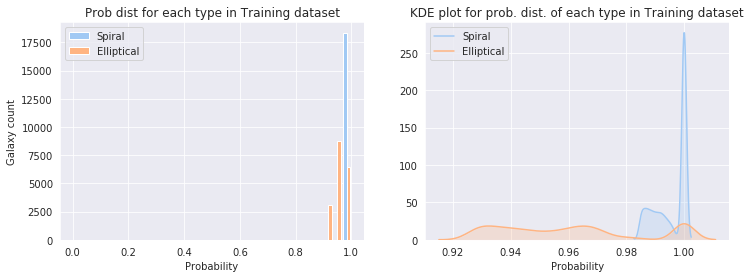

In [40]:
# Probab Distr

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in Training dataset')

#plt.savefig('Training_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in Training dataset')

#plt.savefig('Training_Set_Prob_Dist_KDE.pdf')

Text(0.5, 1.0, 'Violin plot for elliptical in training dataset')

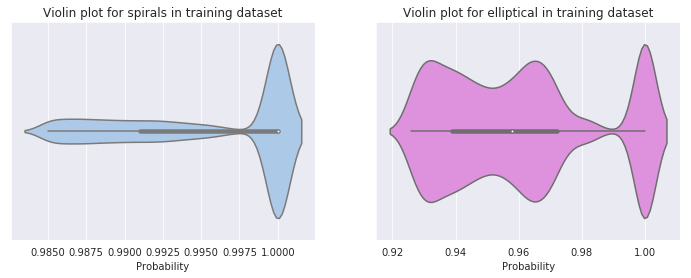

In [41]:
# Prob Distr II

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in training dataset')

#plt.savefig('Violin_Spirals_Training.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in training dataset')

#plt.savefig('Violin_Elliptical_Training.pdf')

Text(0.5, 1.0, 'KDE plot for Petrosian Radius of each type in Training dataset')

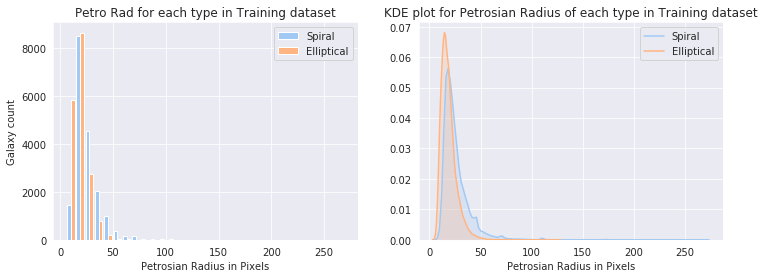

In [42]:
# Petrosian Radius 

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for each type in Training dataset')
#plt.savefig('Training_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of each type in Training dataset')
#plt.savefig('Training_Set_Prob_Dist_KDE.pdf')

Text(0.5, 1.0, 'Ellipticals')

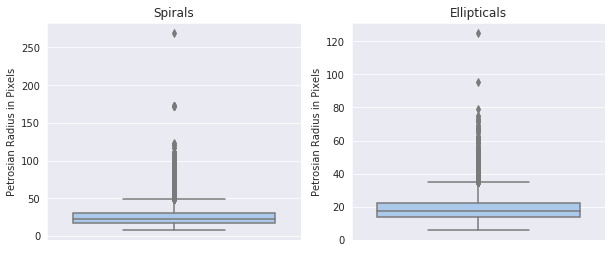

In [43]:
# Petrosian Radius II

plt.figure( figsize=(10,4) )

plt.subplot(1,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Spirals')
#plt.savefig('Radius_Spiral_Train_boxplot.pdf')

plt.subplot(1,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Ellipticals')
#plt.savefig('Radius_Ellip_Train_boxplot.pdf')

Text(0.5, 1.0, 'DEC distribution for training dataset')

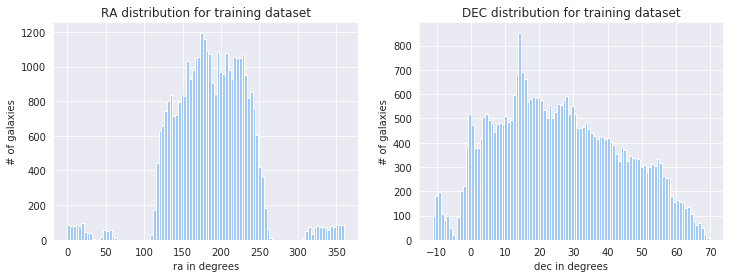

In [44]:
# RA, DEC distribution

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

train_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for training dataset')

#plt.savefig('ra_dist_train.pdf')


plt.subplot(1,2,2)

train_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for training dataset')

#plt.savefig('ra_dist_train.pdf')

Text(0, 0.5, 'dec')

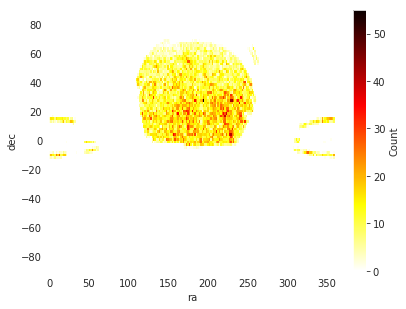

In [45]:
# Footprint

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(train_df['ra'], train_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

# 2. Validation Set 

In [46]:
val_df.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,...,u,g,r,i,z,run,rerun,camcol,field,petroRad_r
0,587738947730997733,07:52:05.39,+18:40:08.0,50,0.960,0.0,0.0,0.04,0.000,0.000,...,20.595406,17.952253,16.617704,16.117149,15.707082,4469,40,4,43,7.712862
1,587741421632618990,07:56:45.63,+14:55:42.3,27,1.000,0.0,0.0,0.00,0.000,0.000,...,19.436848,17.323172,16.281893,15.824057,15.473599,5045,40,4,50,7.089056
2,587737933581582435,07:25:37.12,+41:18:55.2,42,1.000,0.0,0.0,0.00,0.000,0.000,...,19.242897,17.186403,16.086224,15.614598,15.225681,4233,40,3,39,7.665482
3,587728932412195098,08:15:36.09,+41:03:08.5,27,0.926,0.0,0.0,0.00,0.037,0.037,...,21.030668,19.000332,17.713030,17.164619,16.831242,2137,40,5,166,4.194352
4,587733399707779234,14:11:36.04,+52:37:20.7,32,0.969,0.0,0.0,0.00,0.031,0.000,...,20.001802,18.070616,17.015869,16.595926,16.200804,3177,40,6,55,5.140782


In [47]:
Spirals = val_df[ val_df.P_CS_DEBIASED > val_df.P_EL_DEBIASED ]
Ellipticals = val_df[ val_df.P_CS_DEBIASED < val_df.P_EL_DEBIASED ]

In [48]:
print('Total Number of Galaxies in Validation Set: ', val_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

Total Number of Galaxies in Validation Set:  963
Number of Spirals:  456
Number of Ellipticals:  507


Text(0.5, 1.0, 'KDE plot for prob. dist. of each type in Validation dataset')

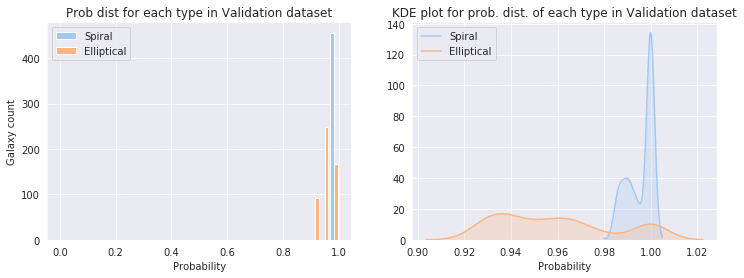

In [49]:
# Probab Distr

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_KDE.pdf')

Text(0.5, 1.0, 'Violin plot for elliptical in validation dataset')

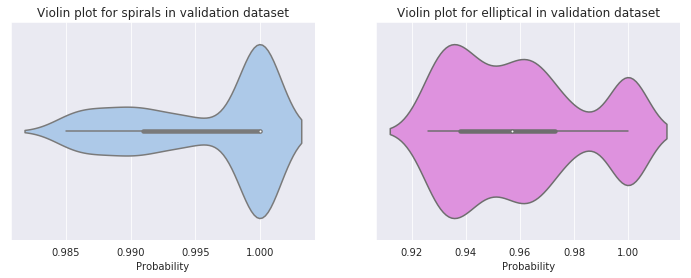

In [50]:
# Prob Distr II

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in validation dataset')

#plt.savefig('Violin_Spirals_Validation.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in validation dataset')

#plt.savefig('Violin_Elliptical_Validation.pdf')

Text(0.5, 1.0, 'KDE plot for Petrosian Radius of each type in Validation dataset')

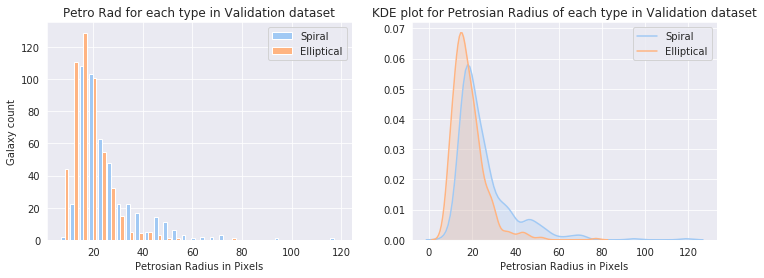

In [51]:
# Petro Rad 

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_KDE.pdf')

Text(0.5, 1.0, 'Ellipticals')

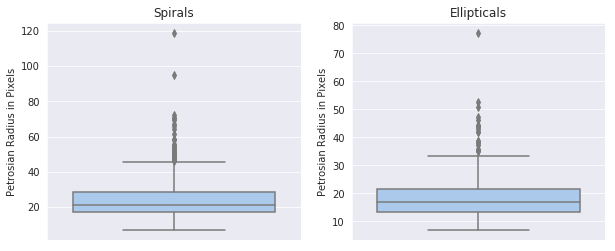

In [52]:
# Petro Rad II

plt.figure( figsize=(10,4) )

plt.subplot(1,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Spirals')
#ax1.savefig('Radius_Spiral_Validatoion_boxplot.pdf')

plt.subplot(1,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Ellipticals')
#plt.savefig('Radius_Ellip_Validatoion_boxplot.pdf')

Text(0.5, 1.0, 'DEC distribution for validation dataset')

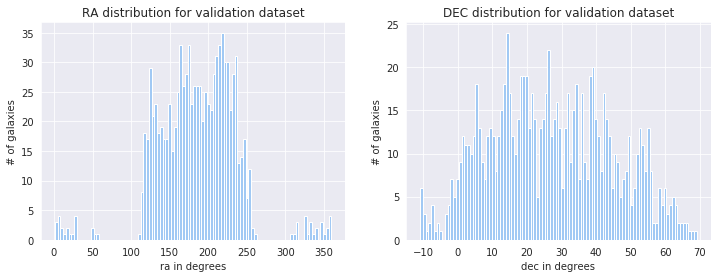

In [53]:
# RA, DEC

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

val_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for validation dataset')

#plt.savefig('ra_dist_validation.pdf')


plt.subplot(1,2,2)

val_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for validation dataset')

#plt.savefig('ra_dist_validation.pdf')

Text(0, 0.5, 'dec')

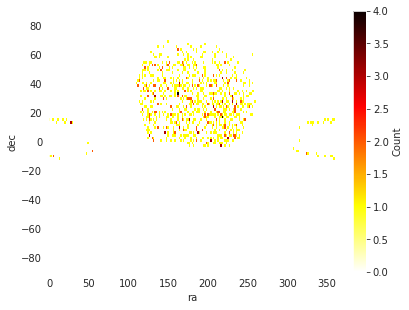

In [54]:
# Footprint

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(val_df['ra'], val_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

# 3. High Probability Crossmacth  Test Set

In [55]:
HP_crossmatch_df.head()

,SDSS_OBJID,RA_sdss,DEC_sdss,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,...,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,d2d_des
0,587731512078958736,02:46:54.20,-00:33:54.7,65,0.015,0.000,0.985,0.000,0.0,0.0,...,0.000092,0.000096,0.000093,0.000229,0.000212,0.000130,0.000113,0.000122,0.000322,0.144753
1,588015508213989555,02:48:07.86,-00:45:08.3,28,0.000,0.036,0.929,0.036,0.0,0.0,...,0.000075,0.000066,0.000066,0.000187,0.000120,0.000085,0.000081,0.000076,0.000205,0.083470
2,588015508214120669,02:49:14.25,-00:45:29.0,56,0.000,0.982,0.000,0.018,0.0,0.0,...,0.000081,0.000079,0.000088,0.000305,0.000108,0.000095,0.000093,0.000116,0.000339,0.353261
3,587731511542349882,02:49:27.95,-00:52:22.8,37,0.000,0.973,0.027,0.000,0.0,0.0,...,0.000035,0.000021,0.000026,0.000062,-99.000000,-99.000000,0.000011,0.000059,0.000068,0.124992
4,588015508214186136,02:49:35.35,-00:43:25.6,30,0.000,0.367,0.100,0.533,0.0,0.0,...,0.000105,0.000120,0.000115,0.000377,0.000135,0.000135,0.000160,0.000178,0.000401,0.363215


In [56]:
Spirals = HP_crossmatch_df[ HP_crossmatch_df.P_CS_DEBIASED > HP_crossmatch_df.P_EL_DEBIASED ]
Ellipticals = HP_crossmatch_df[ HP_crossmatch_df.P_CS_DEBIASED < HP_crossmatch_df.P_EL_DEBIASED ]

In [57]:
print('Total Number of Galaxies in HP Test Set: ', HP_crossmatch_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

Total Number of Galaxies in HP Test Set:  1066
Number of Spirals:  516
Number of Ellipticals:  550


Text(0.5, 1.0, 'KDE plot for prob. dist. of each type in HP Test dataset')

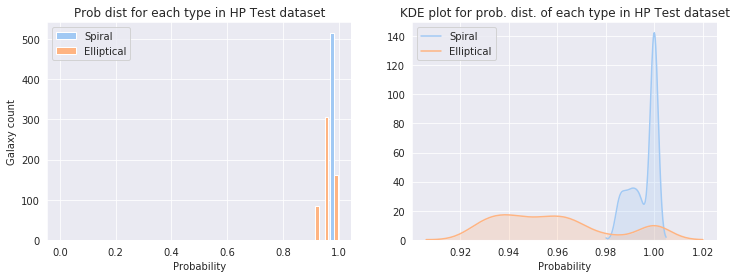

In [58]:
# Prob Distr

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_KDE.pdf')

Text(0.5, 1.0, 'Violin plot for elliptical in HP Test dataset')

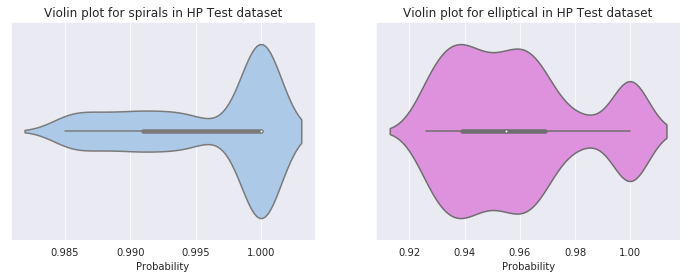

In [59]:
# Prob Distr II

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in HP Test dataset')

#plt.savefig('Violin_Spirals_HPTest.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in HP Test dataset')

#plt.savefig('Violin_Elliptical_HPTest.pdf')

Text(0.5, 1.0, 'KDE plot for KRON Radius of DES galaxies in HP Test dataset')

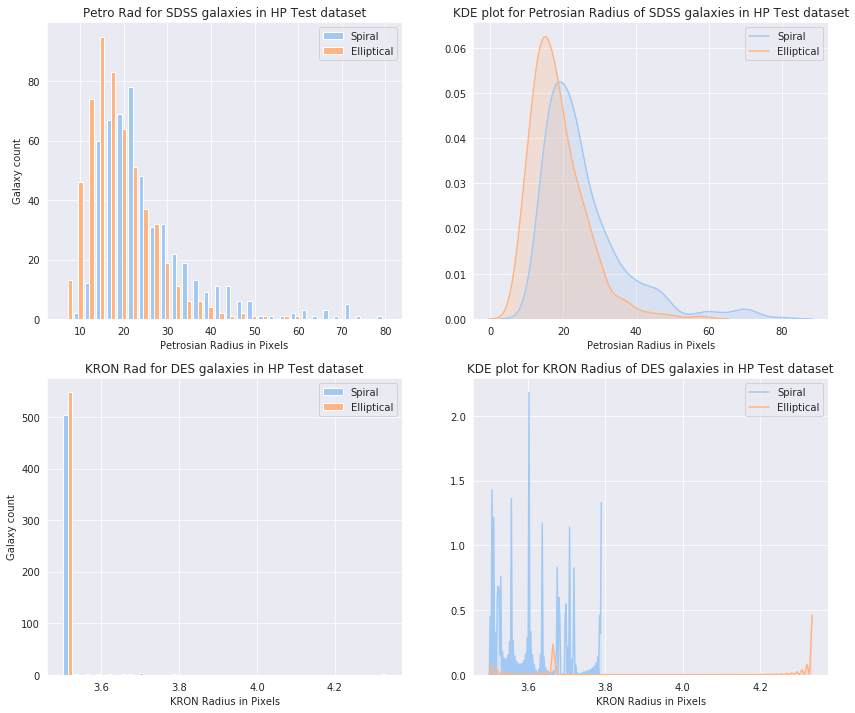

In [60]:
# Petro Rad SDSS, KRON Rad DES

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for SDSS galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of SDSS galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_KDE.pdf')


plt.subplot(2,2,3)

plt.hist([Spirals.KRON_RADIUS, Ellipticals.KRON_RADIUS], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('KRON Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('KRON Rad for DES galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,4)

sns.kdeplot(Spirals.KRON_RADIUS, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.KRON_RADIUS, shade=True, label='Elliptical')
plt.xlabel('KRON Radius in Pixels')
plt.title('KDE plot for KRON Radius of DES galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_KDE.pdf')

Text(0.5, 1.0, 'DES Ellipticals')

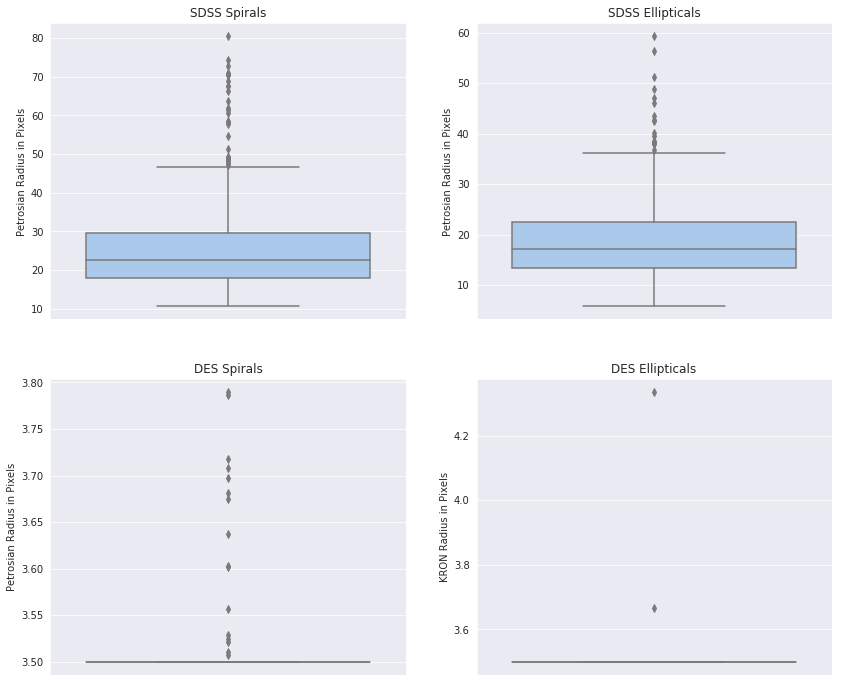

In [61]:
# Petro Rad SDSS, KRON Rad DES II

plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Spirals')
#ax1.savefig('Radius_Spiral_HPTest_boxplot.pdf')

plt.subplot(2,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Ellipticals')
#plt.savefig('Radius_Ellip_HPTest_boxplot.pdf')

plt.subplot(2,2,3)
sns.boxplot(data=Spirals, y=Spirals.KRON_RADIUS)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('DES Spirals')
#ax1.savefig('Radius_Spiral_FOTest_boxplot.pdf')

plt.subplot(2,2,4)
sns.boxplot(data=Ellipticals, y=Ellipticals.KRON_RADIUS)
plt.ylabel('KRON Radius in Pixels')
plt.title('DES Ellipticals')
#plt.savefig('Radius_Ellip_FOTest_boxplot.pdf')

Text(0.5, 1.0, 'DEC distribution for HP Test dataset')

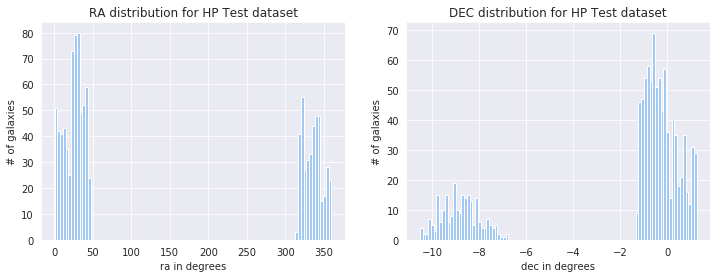

In [62]:
# RA, DEC SDSS

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

HP_crossmatch_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for HP Test dataset')

#plt.savefig('ra_dist_HPTest.pdf')


plt.subplot(1,2,2)

HP_crossmatch_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for HP Test dataset')

#plt.savefig('ra_dist_HPTest.pdf')

Text(0, 0.5, 'dec')

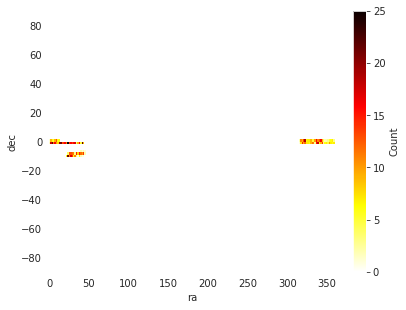

In [63]:
# Footprint

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(HP_crossmatch_df['ra'], HP_crossmatch_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

# 4. Full Overlap Crossmatch Test Set 

In [64]:
FO_crossmatch_df.head()

,SDSS_OBJID,RA_sdss,DEC_sdss,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,...,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,d2d_des
0,588015508195639450,00:00:07.76,-00:43:24.9,42,0.429,0.238,0.000,0.119,0.214,0.000,...,0.000173,0.000179,0.000226,0.000634,0.000185,0.000224,0.000203,0.000239,0.000508,0.037807
1,588015508195639389,00:00:11.61,-00:38:38.3,55,0.273,0.000,0.055,0.655,0.000,0.018,...,0.000068,0.000062,0.000070,0.000184,0.000185,0.000091,0.000079,0.000079,0.000197,0.121433
2,587731185667080362,00:00:25.28,-00:25:41.1,56,0.857,0.000,0.000,0.036,0.107,0.000,...,0.000069,0.000053,0.000065,0.000181,0.000218,0.000105,0.000103,0.000083,0.000276,0.152948
3,587731185667080368,00:00:27.98,-00:26:53.5,60,0.817,0.000,0.017,0.067,0.100,0.000,...,0.000066,0.000050,0.000057,0.000162,0.000139,0.000078,0.000082,0.000066,0.000172,0.123439
4,587731185130274887,00:00:41.30,-00:57:19.5,32,0.719,0.031,0.000,0.031,0.094,0.125,...,0.000059,0.000060,0.000081,0.000215,0.000154,0.000094,0.000088,0.000082,0.000237,0.234692


In [65]:
Spirals = FO_crossmatch_df[ FO_crossmatch_df.P_CS_DEBIASED > FO_crossmatch_df.P_EL_DEBIASED ]
Ellipticals = FO_crossmatch_df[ FO_crossmatch_df.P_CS_DEBIASED < FO_crossmatch_df.P_EL_DEBIASED ]

In [66]:
print('Total Number of Galaxies in HP Test Set: ', FO_crossmatch_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

Total Number of Galaxies in HP Test Set:  12596
Number of Spirals:  6677
Number of Ellipticals:  5904


Text(0.5, 1.0, 'KDE plot for prob. dist. of each type in FO Test dataset')

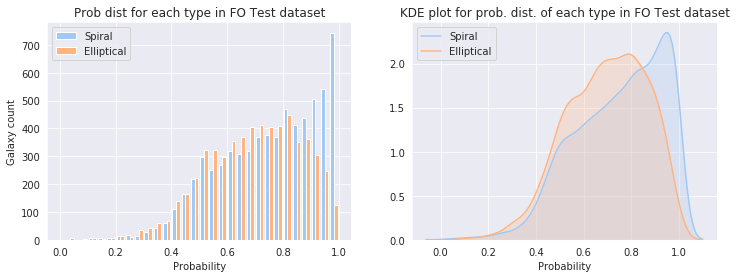

In [67]:
# Prob Distr

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_KDE.pdf')

Text(0.5, 1.0, 'Violin plot for elliptical in FO Test dataset')

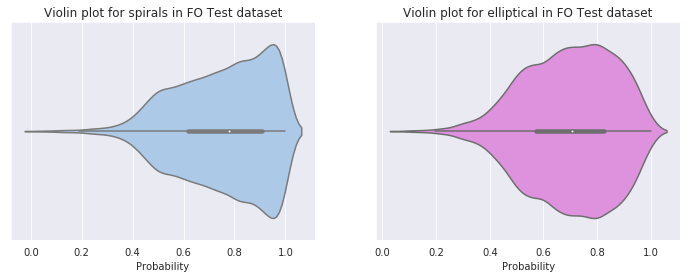

In [68]:
# Prob Distr II

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in FO Test dataset')

#plt.savefig('Violin_Spirals_FOTest.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in FO Test dataset')

#plt.savefig('Violin_Elliptical_FOTest.pdf')

Text(0.5, 1.0, 'KDE plot for KRON Radius of DES galaxies in FO Test dataset')

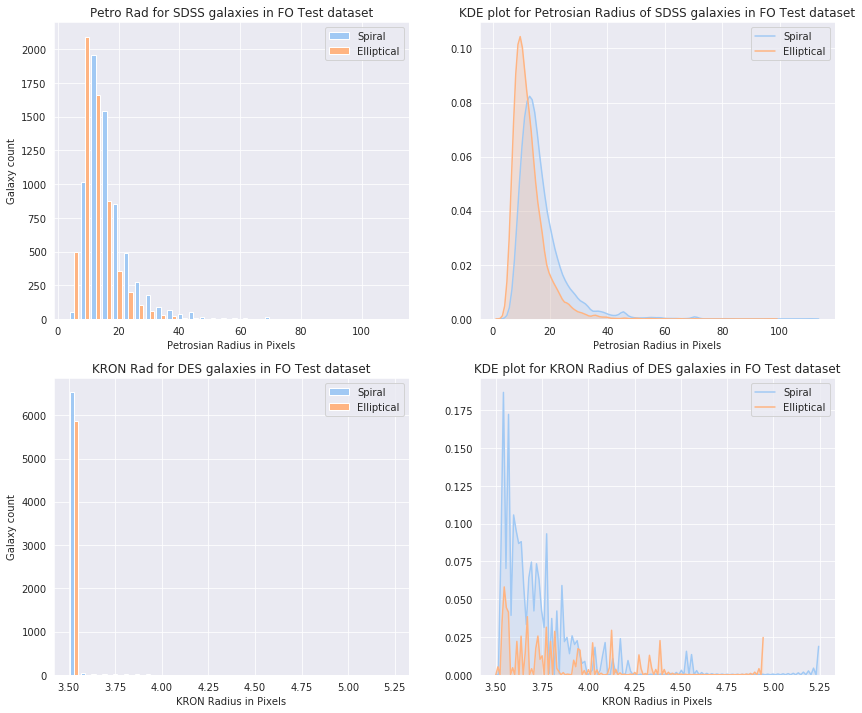

In [69]:
# Petro Rad SDSS, KRON Rad DES

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for SDSS galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of SDSS galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_KDE.pdf')



plt.subplot(2,2,3)

plt.hist([Spirals.KRON_RADIUS, Ellipticals.KRON_RADIUS], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('KRON Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('KRON Rad for DES galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,4)

sns.kdeplot(Spirals.KRON_RADIUS, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.KRON_RADIUS, shade=True, label='Elliptical')
plt.xlabel('KRON Radius in Pixels')
plt.title('KDE plot for KRON Radius of DES galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_KDE.pdf')


Text(0.5, 1.0, 'DES Ellipticals')

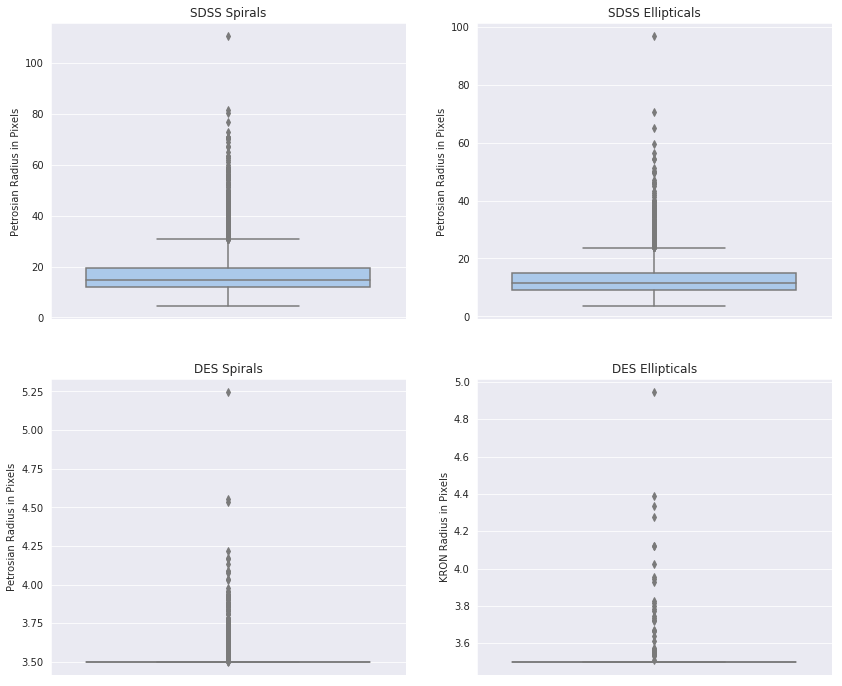

In [70]:
# Petro Rad SDSS, KRON Rad DES II

plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Spirals')
#ax1.savefig('Radius_Spiral_FOTest_boxplot.pdf')

plt.subplot(2,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Ellipticals')
#plt.savefig('Radius_Ellip_FOTest_boxplot.pdf')


plt.subplot(2,2,3)
sns.boxplot(data=Spirals, y=Spirals.KRON_RADIUS)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('DES Spirals')
#ax1.savefig('Radius_Spiral_FOTest_boxplot.pdf')

plt.subplot(2,2,4)
sns.boxplot(data=Ellipticals, y=Ellipticals.KRON_RADIUS)
plt.ylabel('KRON Radius in Pixels')
plt.title('DES Ellipticals')
#plt.savefig('Radius_Ellip_FOTest_boxplot.pdf')

Text(0.5, 1.0, 'DEC distribution for HP Test dataset')

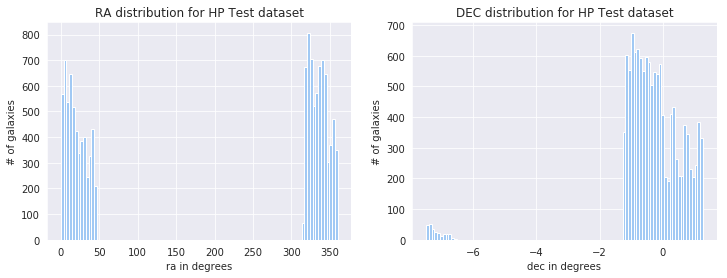

In [71]:
# RA, DEC SDSS

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

FO_crossmatch_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for HP Test dataset')

#plt.savefig('ra_dist_FOTest.pdf')


plt.subplot(1,2,2)

FO_crossmatch_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for HP Test dataset')

#plt.savefig('dec_dist_FOTest.pdf')

Text(0, 0.5, 'dec')

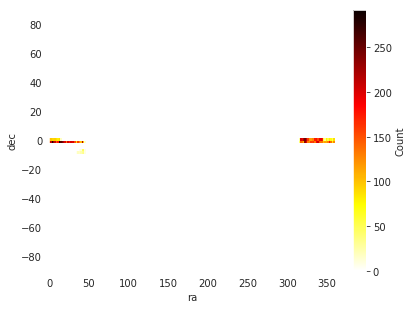

In [72]:
# Footprint

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(FO_crossmatch_df['ra'], FO_crossmatch_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

# All pictures lumped 

Total Number of Galaxies in Training Set:  36620
Number of Spirals:  18352
Number of Ellipticals:  18268
Total Number of Galaxies in Validation Set:  963
Number of Spirals:  456
Number of Ellipticals:  507
Total Number of Galaxies in HP Test Set:  1066
Number of Spirals:  516
Number of Ellipticals:  550
Total Number of Galaxies in HP Test Set:  12596
Number of Spirals:  6677
Number of Ellipticals:  5904


/home/khan74/.conda/envs/myanaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0, 0.5, 'dec')

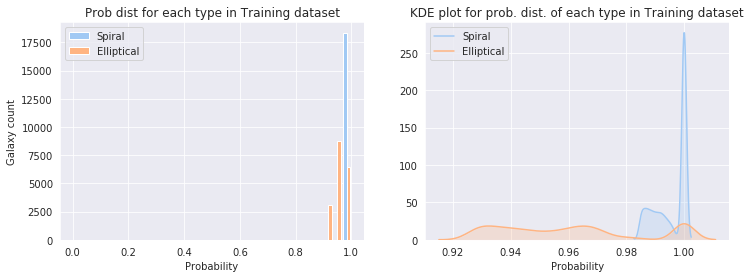

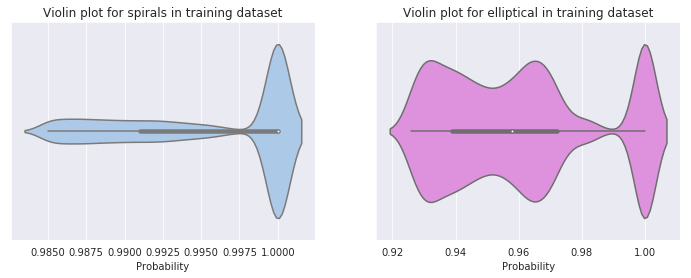

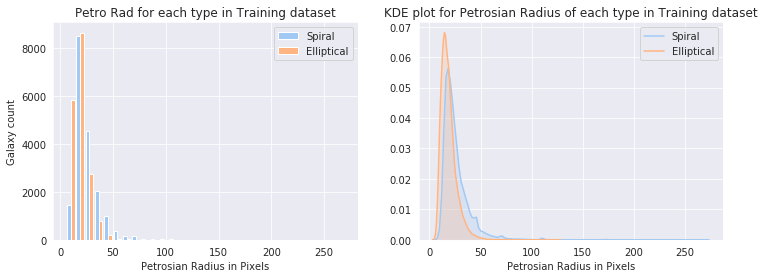

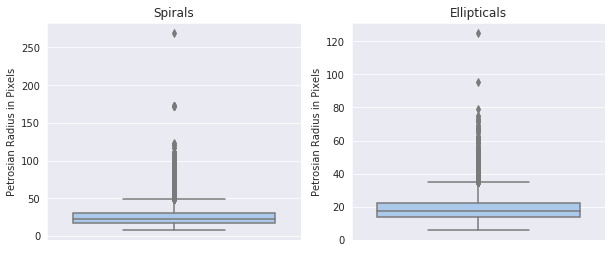

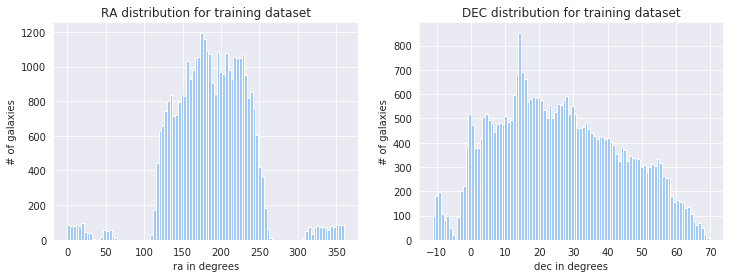

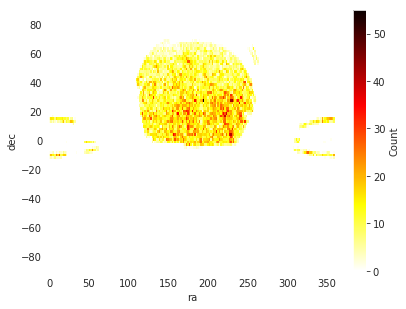

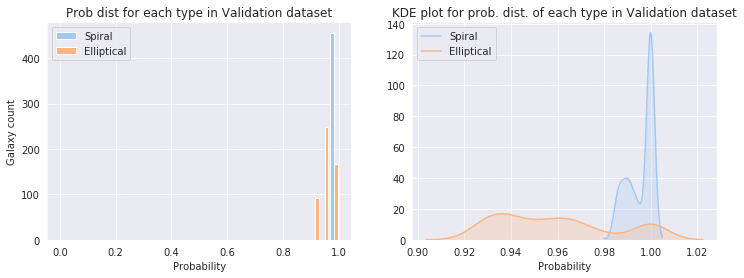

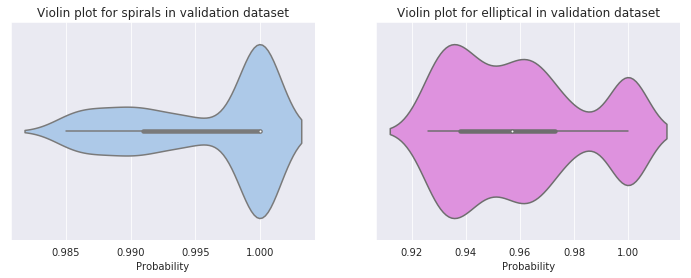

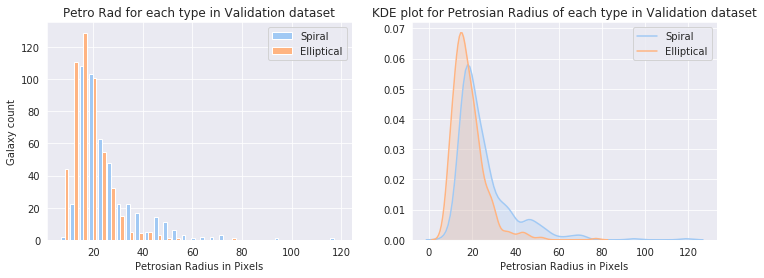

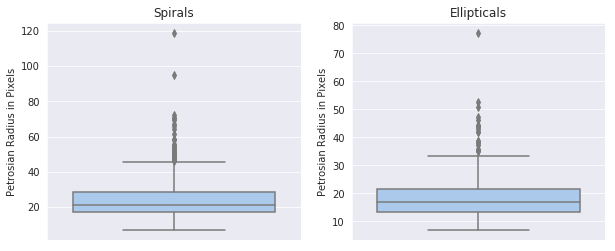

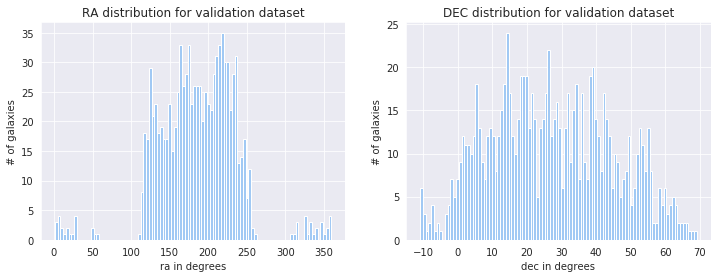

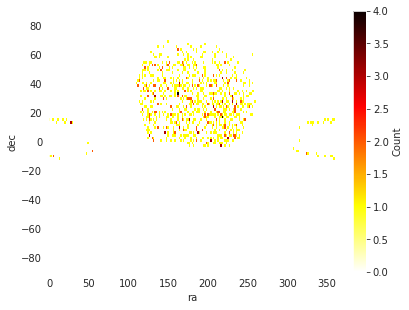

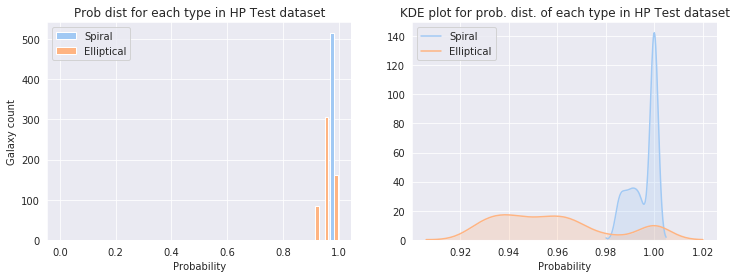

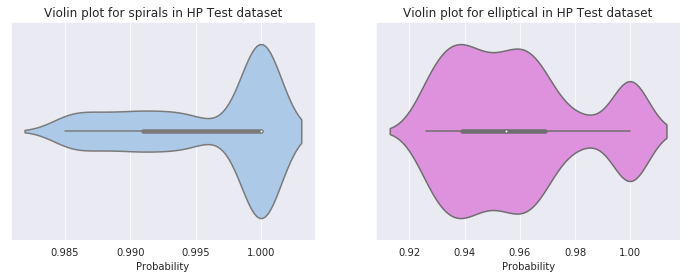

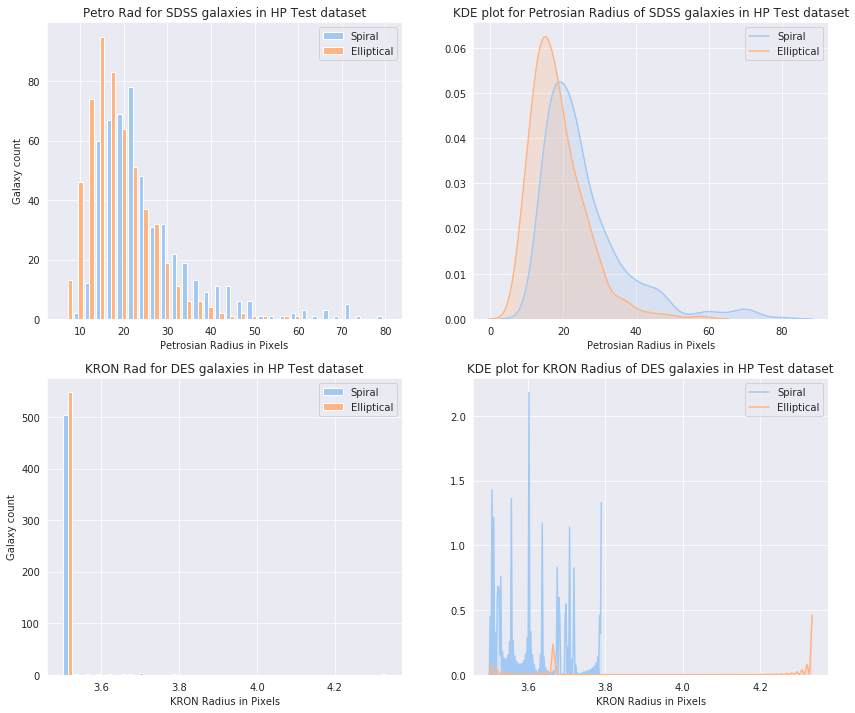

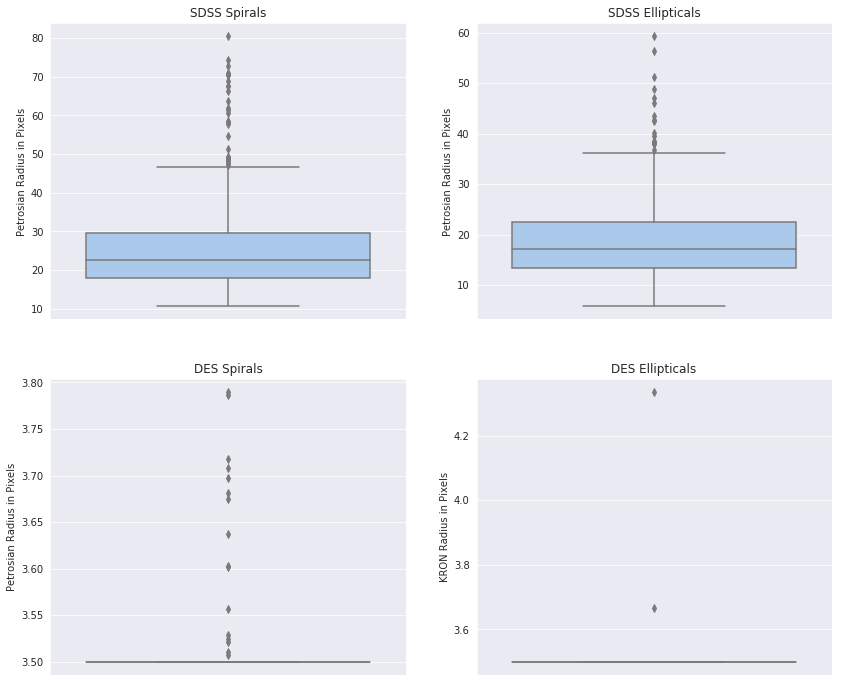

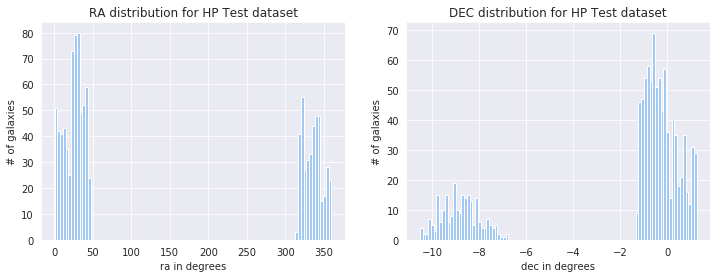

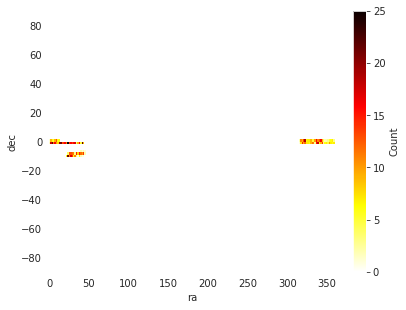

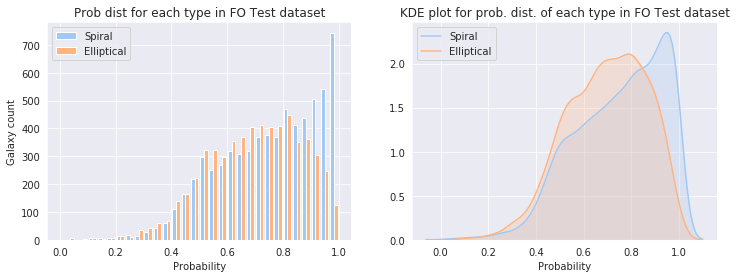

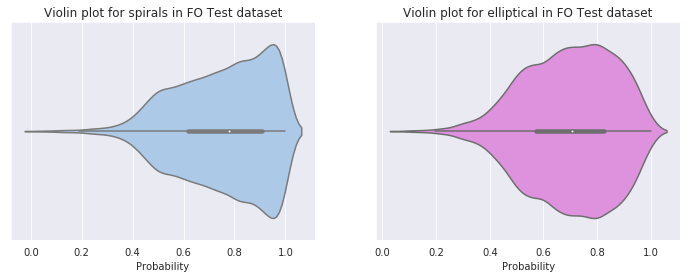

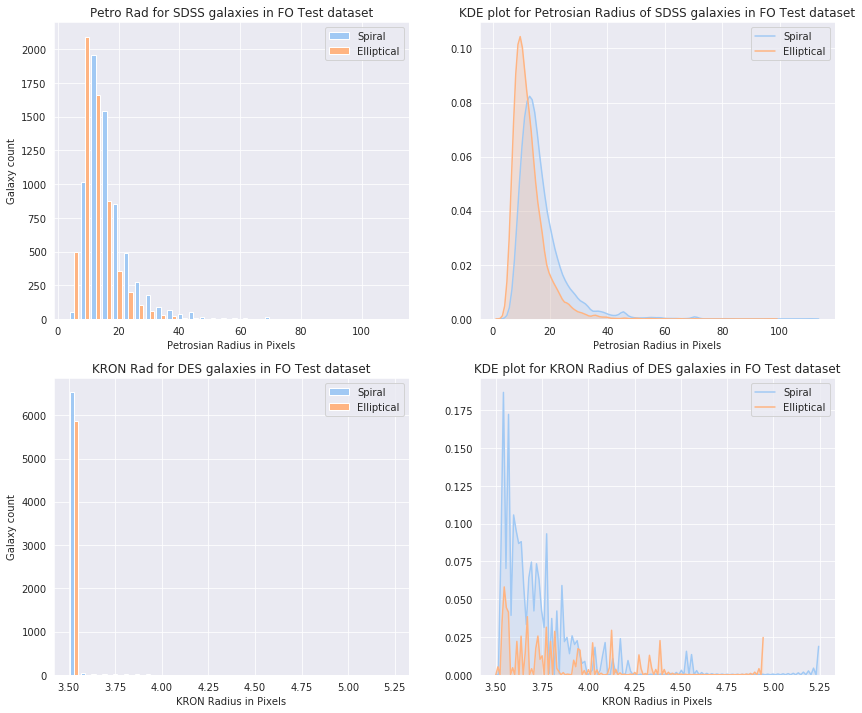

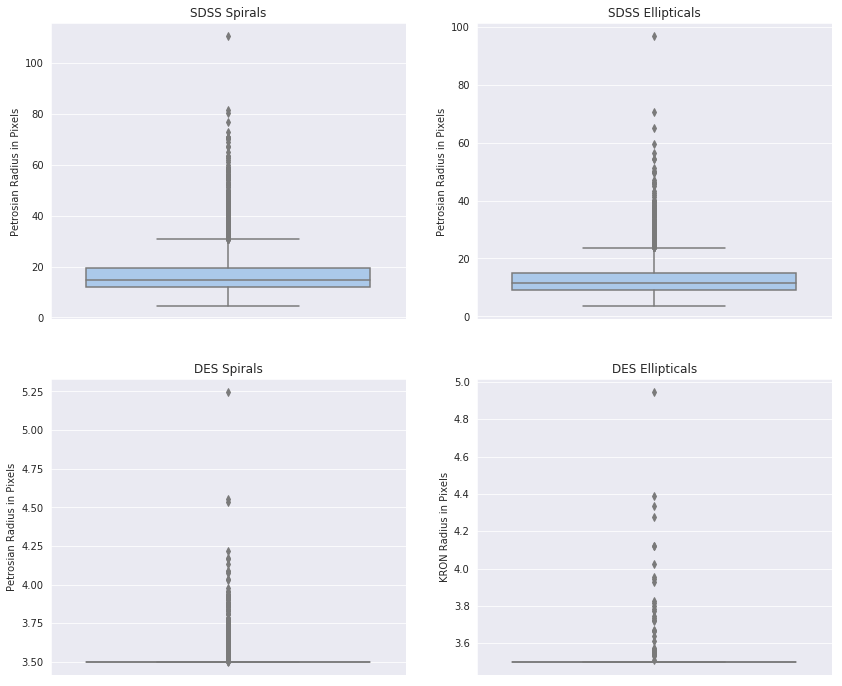

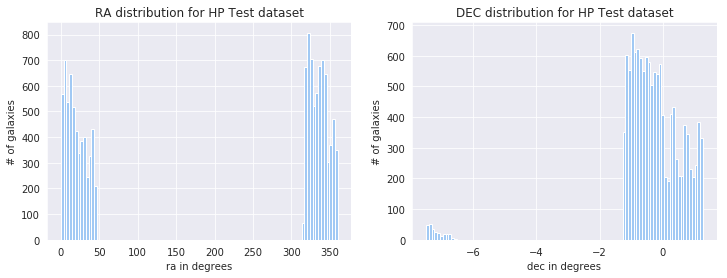

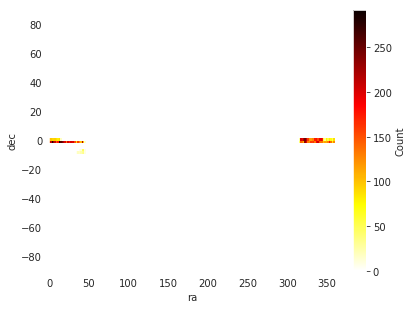

In [73]:
# 1. Training Set 

train_df.head()

Spirals = train_df[ train_df.P_CS_DEBIASED > train_df.P_EL_DEBIASED ]
Ellipticals = train_df[ train_df.P_CS_DEBIASED < train_df.P_EL_DEBIASED ]

print('Total Number of Galaxies in Training Set: ', train_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in Training dataset')

#plt.savefig('Training_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in Training dataset')

#plt.savefig('Training_Set_Prob_Dist_KDE.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in training dataset')

#plt.savefig('Violin_Spirals_Training.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in training dataset')

#plt.savefig('Violin_Elliptical_Training.pdf')

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for each type in Training dataset')
#plt.savefig('Training_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of each type in Training dataset')
#plt.savefig('Training_Set_Prob_Dist_KDE.pdf')

plt.figure( figsize=(10,4) )

plt.subplot(1,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Spirals')
#plt.savefig('Radius_Spiral_Train_boxplot.pdf')

plt.subplot(1,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Ellipticals')
#plt.savefig('Radius_Ellip_Train_boxplot.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

train_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for training dataset')

#plt.savefig('ra_dist_train.pdf')


plt.subplot(1,2,2)

train_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for training dataset')

#plt.savefig('ra_dist_train.pdf')

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(train_df['ra'], train_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

# 2. Validation Set 

val_df.head()

Spirals = val_df[ val_df.P_CS_DEBIASED > val_df.P_EL_DEBIASED ]
Ellipticals = val_df[ val_df.P_CS_DEBIASED < val_df.P_EL_DEBIASED ]

print('Total Number of Galaxies in Validation Set: ', val_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_KDE.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in validation dataset')

#plt.savefig('Violin_Spirals_Validation.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in validation dataset')

#plt.savefig('Violin_Elliptical_Validation.pdf')

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of each type in Validation dataset')
#plt.savefig('Validation_Set_Prob_Dist_KDE.pdf')

plt.figure( figsize=(10,4) )

plt.subplot(1,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Spirals')
#ax1.savefig('Radius_Spiral_Validatoion_boxplot.pdf')

plt.subplot(1,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('Ellipticals')
#plt.savefig('Radius_Ellip_Validatoion_boxplot.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

val_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for validation dataset')

#plt.savefig('ra_dist_validation.pdf')


plt.subplot(1,2,2)

val_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for validation dataset')

#plt.savefig('ra_dist_validation.pdf')

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(val_df['ra'], val_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

# 3. High Probability Crossmacth  Test Set

HP_crossmatch_df.head()

Spirals = HP_crossmatch_df[ HP_crossmatch_df.P_CS_DEBIASED > HP_crossmatch_df.P_EL_DEBIASED ]
Ellipticals = HP_crossmatch_df[ HP_crossmatch_df.P_CS_DEBIASED < HP_crossmatch_df.P_EL_DEBIASED ]

print('Total Number of Galaxies in HP Test Set: ', HP_crossmatch_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_KDE.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in HP Test dataset')

#plt.savefig('Violin_Spirals_HPTest.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in HP Test dataset')

#plt.savefig('Violin_Elliptical_HPTest.pdf')

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for SDSS galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of SDSS galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_KDE.pdf')


plt.subplot(2,2,3)

plt.hist([Spirals.KRON_RADIUS, Ellipticals.KRON_RADIUS], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('KRON Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('KRON Rad for DES galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,4)

sns.kdeplot(Spirals.KRON_RADIUS, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.KRON_RADIUS, shade=True, label='Elliptical')
plt.xlabel('KRON Radius in Pixels')
plt.title('KDE plot for KRON Radius of DES galaxies in HP Test dataset')
#plt.savefig('HPTest_Set_Prob_Dist_KDE.pdf')

plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Spirals')
#ax1.savefig('Radius_Spiral_HPTest_boxplot.pdf')

plt.subplot(2,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Ellipticals')
#plt.savefig('Radius_Ellip_HPTest_boxplot.pdf')

plt.subplot(2,2,3)
sns.boxplot(data=Spirals, y=Spirals.KRON_RADIUS)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('DES Spirals')
#ax1.savefig('Radius_Spiral_FOTest_boxplot.pdf')

plt.subplot(2,2,4)
sns.boxplot(data=Ellipticals, y=Ellipticals.KRON_RADIUS)
plt.ylabel('KRON Radius in Pixels')
plt.title('DES Ellipticals')
#plt.savefig('Radius_Ellip_FOTest_boxplot.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

HP_crossmatch_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for HP Test dataset')

#plt.savefig('ra_dist_HPTest.pdf')


plt.subplot(1,2,2)

HP_crossmatch_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for HP Test dataset')

#plt.savefig('ra_dist_HPTest.pdf')

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(HP_crossmatch_df['ra'], HP_crossmatch_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

# 4. Full Overlap Crossmatch Test Set 

FO_crossmatch_df.head()

Spirals = FO_crossmatch_df[ FO_crossmatch_df.P_CS_DEBIASED > FO_crossmatch_df.P_EL_DEBIASED ]
Ellipticals = FO_crossmatch_df[ FO_crossmatch_df.P_CS_DEBIASED < FO_crossmatch_df.P_EL_DEBIASED ]

print('Total Number of Galaxies in HP Test Set: ', FO_crossmatch_df.shape[0])
print('Number of Spirals: ', Spirals.shape[0])
print('Number of Ellipticals: ', Ellipticals.shape[0])

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

plt.hist([Spirals.P_CS_DEBIASED, Ellipticals.P_EL_DEBIASED], bins=30, range=(0, 1), label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(1,2,2)

sns.kdeplot(Spirals.P_CS_DEBIASED, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.P_EL_DEBIASED, shade=True, label='Elliptical')
plt.xlabel('Probability')
plt.title('KDE plot for prob. dist. of each type in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_KDE.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

sns.violinplot(Spirals.P_CS_DEBIASED, saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in FO Test dataset')

#plt.savefig('Violin_Spirals_FOTest.pdf')


plt.subplot(1,2,2)

sns.violinplot(Ellipticals.P_EL_DEBIASED, color='violet', saturation=0.7)
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in FO Test dataset')

#plt.savefig('Violin_Elliptical_FOTest.pdf')

pxl_size=0.396      #the size of each pixel in arcseconds. The SDSS FITS files come in 0.396"
                    #(see http://classic.sdss.org/dr7/instruments/imager/).


plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)

plt.hist([Spirals.petroRad_r/pxl_size, Ellipticals.petroRad_r/pxl_size], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('Petrosian Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('Petro Rad for SDSS galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,2)

sns.kdeplot(Spirals.petroRad_r/pxl_size, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.petroRad_r/pxl_size, shade=True, label='Elliptical')
plt.xlabel('Petrosian Radius in Pixels')
plt.title('KDE plot for Petrosian Radius of SDSS galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_KDE.pdf')



plt.subplot(2,2,3)

plt.hist([Spirals.KRON_RADIUS, Ellipticals.KRON_RADIUS], bins=30, label=['Spiral', 'Elliptical'])
plt.legend()
plt.xlabel('KRON Radius in Pixels')
plt.ylabel('Galaxy count')
plt.title('KRON Rad for DES galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_Hist.pdf')


plt.subplot(2,2,4)

sns.kdeplot(Spirals.KRON_RADIUS, shade=True, label='Spiral')
sns.kdeplot(Ellipticals.KRON_RADIUS, shade=True, label='Elliptical')
plt.xlabel('KRON Radius in Pixels')
plt.title('KDE plot for KRON Radius of DES galaxies in FO Test dataset')
#plt.savefig('FOTest_Set_Prob_Dist_KDE.pdf')


plt.figure( figsize=(14,12) )

plt.subplot(2,2,1)
sns.boxplot(data=Spirals, y=Spirals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Spirals')
#ax1.savefig('Radius_Spiral_FOTest_boxplot.pdf')

plt.subplot(2,2,2)
sns.boxplot(data=Ellipticals, y=Ellipticals.petroRad_r/pxl_size)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('SDSS Ellipticals')
#plt.savefig('Radius_Ellip_FOTest_boxplot.pdf')


plt.subplot(2,2,3)
sns.boxplot(data=Spirals, y=Spirals.KRON_RADIUS)
plt.ylabel('Petrosian Radius in Pixels')
plt.title('DES Spirals')
#ax1.savefig('Radius_Spiral_FOTest_boxplot.pdf')

plt.subplot(2,2,4)
sns.boxplot(data=Ellipticals, y=Ellipticals.KRON_RADIUS)
plt.ylabel('KRON Radius in Pixels')
plt.title('DES Ellipticals')
#plt.savefig('Radius_Ellip_FOTest_boxplot.pdf')

plt.figure( figsize=(12,4) )

plt.subplot(1,2,1)

FO_crossmatch_df.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for HP Test dataset')

#plt.savefig('ra_dist_FOTest.pdf')


plt.subplot(1,2,2)

FO_crossmatch_df.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for HP Test dataset')

#plt.savefig('dec_dist_FOTest.pdf')

plt.figure( figsize=(6.4, 4.8) )

plt.hist2d(FO_crossmatch_df['ra'], FO_crossmatch_df['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

